In [3]:
import time
import numpy as np
import pandas as pd
from sklearn import metrics
import joblib
import warnings
import os
warnings.filterwarnings('ignore')

In [4]:
from pathlib import Path
import pandas as pd

# Updated file path based on the provided path
file_path = r'C:\Users\ASRASH\OneDrive - Ashesi University\PHATTY\School\4 Senior\Semester 2\Thesis II\Typhoid-main\Typhoid-main\Typhoid.xlsx'

# Create a Path object
path_obj = Path(file_path)

# Check if the file exists using Pathlib
if path_obj.is_file():
    try:
        data = pd.read_excel(file_path)
        print(data)
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
else:
    print(f"File not found at path: {file_path}")


     Unnamed: 0  Age (in years)  Sex  \
0             1              30    1   
1             2              29    0   
2             3              50    0   
3             4              54    1   
4             5              31    0   
..          ...             ...  ...   
305         306              57    0   
306         307              23    0   
307         308              51    0   
308         309              32    1   
309         310              32    0   

     Clinical symptoms     (present = 1, Absent = 0)  Temperature  \
0                                                  1          101   
1                                                  1          101   
2                                                  1          101   
3                                                  0           98   
4                                                  1          100   
..                                               ...          ...   
305                                 

In [5]:
positive = data.loc[data['Target'] == 1]
negative = data.loc[data['Target'] == 0]

X = data.iloc[:, 0:9]
Y = data.iloc[:, -1]

In [6]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 300)

In [9]:

# Define the directory and file path
directory = '../models'
file_path = os.path.join(directory, 'Typhoid_RF.pkl')

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the model
joblib.dump(RFC, file_path)

print('Model saved successfully.')


Model saved successfully.


In [8]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(xtrain, ytrain)
pred_rfc = RFC.predict(xtest)
acc_rfc = metrics.accuracy_score(ytest, pred_rfc)*100
joblib.dump(RFC, '../models/Typhoid_RF.pkl')


print('1. Using Random Forest Method')
print('Accuracy - {}'.format(acc_rfc))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_rfc)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_rfc)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_rfc))
print('\n')
time.sleep(1)

1. Using Random Forest Method
Accuracy - 98.0
Recall - 0.985
Precision Score - 0.985
Confusion matrix
[[ 97   3]
 [  3 197]]




In [10]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(xtrain, ytrain)
pred_gb = GB.predict(xtest)
acc_gb = metrics.accuracy_score(ytest, pred_gb)*100
joblib.dump(GB, '../models/Typhoid_GB.pkl')

print('2. Using Gradient Boosting Method')
print('Accuracy - {}'.format(acc_gb))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_gb)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_gb)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_gb))

2. Using Gradient Boosting Method
Accuracy - 98.0
Recall - 1.0
Precision Score - 0.970873786407767
Confusion matrix
[[ 94   6]
 [  0 200]]


In [11]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain, ytrain)
pred_lr = LR.predict(xtest)
acc_lr = metrics.accuracy_score(ytest, pred_lr)*100
joblib.dump(LR, '../models/Typhoid_LR.pkl')

print('3. Using Logistic Regression Method')
print('Accuracy - {}'.format(acc_lr))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_lr)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_lr)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_lr))

3. Using Logistic Regression Method
Accuracy - 67.0
Recall - 0.93
Precision Score - 0.6863468634686347
Confusion matrix
[[ 15  85]
 [ 14 186]]


In [188]:
from sklearn import svm
SVM = svm.LinearSVC(loss='hinge')
SVM.fit(xtrain, ytrain)
pred_svm = SVM.predict(xtest)
acc_svm = metrics.accuracy_score(ytest, pred_svm)*100
joblib.dump(SVM, '../models/Typhoid_SVM.pkl')

print('4. Using SVM Method')
print('Accuracy - {}'.format(acc_svm))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_svm)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_svm)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_svm))

4. Using SVM Method
Accuracy - 61.33333333333333
Recall - 0.5771144278606966
Precision Score - 0.7891156462585034
Confusion matrix
[[ 68  31]
 [ 85 116]]


In [12]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(xtrain, ytrain)
pred_knn = KNN.predict(xtest)
acc_knn = metrics.accuracy_score(ytest, pred_knn)*100
joblib.dump(KNN, '../models/Typhoid_KNN.pkl')

print('5. Using KNN Method')
print('Accuracy - {}'.format(acc_knn))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_knn)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_knn)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_knn))

5. Using KNN Method
Accuracy - 64.66666666666666
Recall - 0.94
Precision Score - 0.6666666666666666
Confusion matrix
[[  6  94]
 [ 12 188]]


In [13]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=10, random_state=101, max_features=None, min_samples_leaf=10)
DT.fit(xtrain, ytrain)
pred_DT = DT.predict(xtest)
acc_DT = metrics.accuracy_score(ytest, pred_DT)*100
joblib.dump(DT, '../models/Typhoid_DT.pkl')

print('6. Using Decision Tree Method')
print('Accuracy - {}'.format(acc_DT))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_DT)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_DT)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_DT))

6. Using Decision Tree Method
Accuracy - 66.66666666666666
Recall - 1.0
Precision Score - 0.6666666666666666
Confusion matrix
[[  0 100]
 [  0 200]]


In [166]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(64, 32, 1))
MLP.fit(xtrain, ytrain)
pred_MLP = MLP.predict(xtest)
acc_MLP = metrics.accuracy_score(ytest, pred_MLP)*100
joblib.dump(MLP, '../models/Typhoid_MLP.pkl')

print('8. Using MLP Method')
print('Accuracy - {}'.format(acc_MLP))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_MLP)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_MLP)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_MLP))

8. Using MLP Method
Accuracy - 33.0
Recall - 0.0
Precision Score - 0.0
Confusion matrix
[[ 99   0]
 [201   0]]


In [189]:

import matplotlib.pyplot as plt

# Define the directory and file path
directory = '../graphs'
file_path = os.path.join(directory, 'Comparision_Study_typhoid.png')

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)




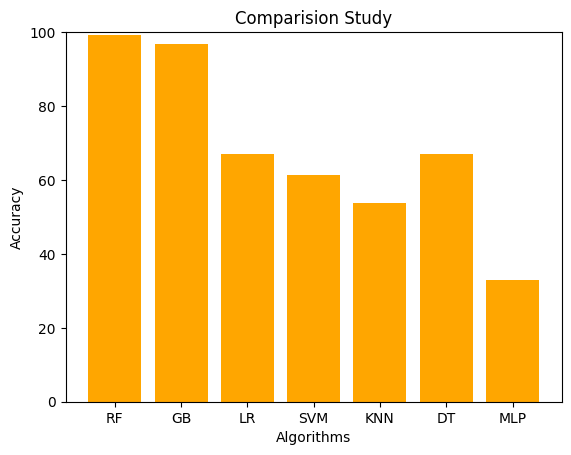

In [190]:


#Defining labels and data
height = [acc_rfc, acc_gb, acc_lr, acc_svm , acc_knn, acc_DT, acc_MLP]
bars = ('RF', 'GB', 'LR', 'SVM', 'KNN', 'DT', 'MLP')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color = (1.00, 0.65, 0.00, 1.0))
 
# Add Title and Axis names
plt.title('Comparision Study')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
 
# Limits for the Y axis
plt.ylim(0,100) 
# Create names
plt.xticks(y_pos, bars) 
#Save the graphic
plt.savefig('../graphs/Comparision_Study_typhoid')
# Show graphic
plt.show()

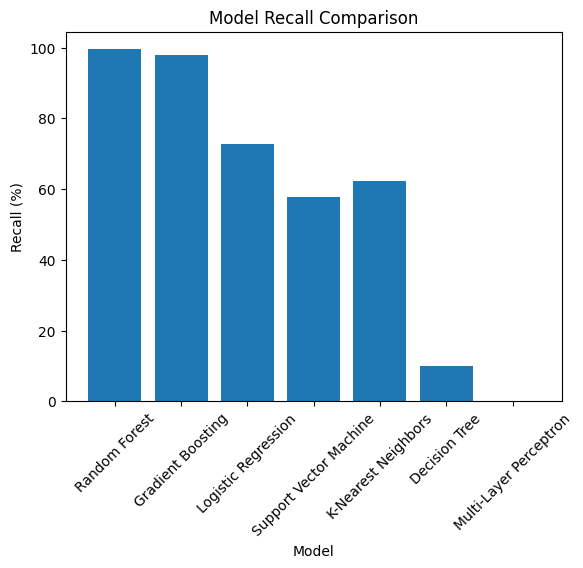

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors', 'Decision Tree', 'Multi-Layer Perceptron']
recall = [99.50, 98.00, 72.63, 57.71, 62.18, 10.0, 0.00]

# Create the bar chart
plt.bar(models, recall)
plt.xlabel('Model')
plt.ylabel('Recall (%)')
plt.title('Model Recall Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


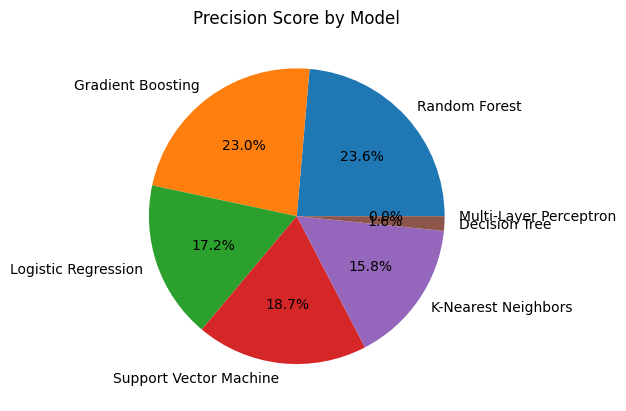

In [2]:
import matplotlib.pyplot as plt

# Data
models = ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors', 'Decision Tree', 'Multi-Layer Perceptron']
precision = [99.50, 97.04, 72.63, 78.91, 66.48, 6.7, 0.00]

# Create the pie chart
plt.pie(precision, labels=models, autopct='%1.1f%%')
plt.title('Precision Score by Model')
plt.show()
